In [36]:
import numpy as np

import tensorflow as tf

tf.autograph.set_verbosity(0)
tf.autograph.experimental.do_not_convert()


<function tensorflow.python.autograph.impl.api.do_not_convert(func=None)>

In [37]:
## download and load data
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [38]:
## reshape images to 1-dimensional array
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])

In [39]:
## check if labels are same size and contain same values
print(np.unique(y_train) == np.unique(y_test))
print(len(np.unique(y_train)) == len(np.unique(y_test)))


[ True  True  True  True  True  True  True  True  True  True]
True


In [40]:
from sklearn.metrics import f1_score, roc_auc_score
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

layers = [
    Dense(
        input_dim=X_train.shape[1],
        units=256,
        kernel_initializer="uniform",
        activation="relu",
    ),
    Dense(units=10, kernel_initializer="uniform", activation="softmax"),
]
for layer in layers:
    model.add(layer)

model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

model.summary()

model_history = model.fit(X_train, y_train, epochs=25, verbose=0)

test_loss = model.evaluate(X_test, y_test, verbose=0)
y_pred = np.argmax(model.predict(X_test), axis=-1)
f1 = f1_score(y_test, y_pred, average="weighted")
y_pred_prob = model.predict(X_test)
roc = roc_auc_score(y_test, y_pred_prob, multi_class="ovo")

print(
    f"""
Accuracy:       {round(test_loss[1] * 100, 5)}%
F1 Score:       {round(f1, 5)}
ROC AUC Score:  {round(roc, 5)}
Total Loss:     {round(test_loss[0], 5)}
"""
)


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________

Accuracy:       95.54%
F1 Score:       0.95576
ROC AUC Score:  0.99631
Total Loss:     0.51328



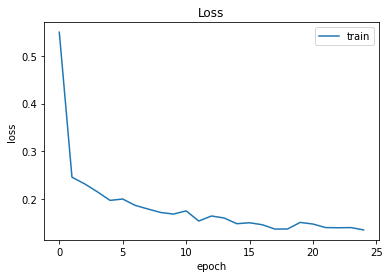

In [49]:
import matplotlib.pyplot as plt

loss_arr = model_history.history["loss"]
plt.plot(loss_arr)
plt.title("Loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train'], loc='upper right')
plt.show()


In [56]:
total = {x: {"total": 0, "count": 0} for x in range(10)}
for i in range(len(y_pred)):
    c = y_test[i]
    if y_pred[i] == y_test[i]:
        total[c]["count"] += 1
    total[c]["total"] += 1

for k, v in total.items():
    print(f"Accuracy for {k}: {round(v['count'] / v['total'] * 100, 3)}%")


Accuracy for 0: 97.245%
Accuracy for 1: 98.15%
Accuracy for 2: 94.864%
Accuracy for 3: 94.653%
Accuracy for 4: 94.705%
Accuracy for 5: 92.152%
Accuracy for 6: 96.555%
Accuracy for 7: 96.012%
Accuracy for 8: 96.509%
Accuracy for 9: 93.954%
